# Date your Mate !!!

Candid from the Speed Dating Event !

![](speed_dating.jpg)

#### Description 

What influences love at first sight? (Or, at least, love in the first four minutes?) This dataset was compiled by Columbia Business School professors Ray Fisman and Sheena Iyengar for their paper Gender Differences in Mate Selection: Evidence From a Speed Dating Experiment.

Data was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests.

The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: demographics, dating habits, self-perception across key attributes, beliefs on what others find valuable in a mate, and lifestyle information.


#### Data Exploration tasks

<ul>
<li>What are the least desirable attributes in a male partner? Does this differ for female partners?</li><br>
<li>How important do people think attractiveness is in potential mate selection vs. its real impact?</li><br>
<li>Are shared interests more important than a shared racial background?</li><br>
<li>Can people accurately predict their own perceived value in the dating market?</li><br>
<li>In terms of getting a second date, is it better to be someone's first speed date of the night or their last?</li><br>
</ul>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Date-your-Mate-!!!" data-toc-modified-id="Date-your-Mate-!!!-1">Date your Mate !!!</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1.0.0.1">Description</a></span></li><li><span><a href="#Data-Exploration-tasks" data-toc-modified-id="Data-Exploration-tasks-1.0.0.2">Data Exploration tasks</a></span></li><li><span><a href="#Importing-necessary-libraries" data-toc-modified-id="Importing-necessary-libraries-1.0.0.3">Importing necessary libraries</a></span></li><li><span><a href="#Reading-the-dataset" data-toc-modified-id="Reading-the-dataset-1.0.0.4">Reading the dataset</a></span></li><li><span><a href="#Analysing-stats-of-the-data-set" data-toc-modified-id="Analysing-stats-of-the-data-set-1.0.0.5">Analysing stats of the data set</a></span></li><li><span><a href="#Exloring-Null-Values" data-toc-modified-id="Exloring-Null-Values-1.0.0.6">Exloring Null Values</a></span></li><li><span><a href="#Exploring-Age-Factor" data-toc-modified-id="Exploring-Age-Factor-1.0.0.7">Exploring Age Factor</a></span></li><li><span><a href="#Let's-see-how-many-speed-daters-found-a-match" data-toc-modified-id="Let's-see-how-many-speed-daters-found-a-match-1.0.0.8">Let's see how many speed daters found a match</a></span></li><li><span><a href="#Exploring-Gender-factor" data-toc-modified-id="Exploring-Gender-factor-1.0.0.9">Exploring Gender factor</a></span></li><li><span><a href="#Analysing-the-age-and-gender" data-toc-modified-id="Analysing-the-age-and-gender-1.0.0.10">Analysing the age and gender</a></span></li><li><span><a href="#The-Gender-Advantage" data-toc-modified-id="The-Gender-Advantage-1.0.0.11">The Gender Advantage</a></span></li><li><span><a href="#Broken-Hearts" data-toc-modified-id="Broken-Hearts-1.0.0.12">Broken Hearts</a></span></li><li><span><a href="#Professions-most-in-demand" data-toc-modified-id="Professions-most-in-demand-1.0.0.13">Professions most in demand</a></span></li><li><span><a href="#Let's-Analyse-the-GOAL-of-participants" data-toc-modified-id="Let's-Analyse-the-GOAL-of-participants-1.0.0.14">Let's Analyse the GOAL of participants</a></span></li><li><span><a href="#Hobbies" data-toc-modified-id="Hobbies-1.0.0.15">Hobbies</a></span></li><li><span><a href="#Let's-check-out-the-relation-between-SAT-score-and-match" data-toc-modified-id="Let's-check-out-the-relation-between-SAT-score-and-match-1.0.0.16">Let's check out the relation between SAT score and match</a></span></li><li><span><a href="#oops,-we-are-forgeting-about-religion-and-race,-lets-explore" data-toc-modified-id="oops,-we-are-forgeting-about-religion-and-race,-lets-explore-1.0.0.17">oops, we are forgeting about religion and race, lets explore</a></span></li><li><span><a href="#One-of-my-friend-told-me-that-womens-generally-prefer-elder-boyfriends,-let-us-figure-out-from-this-data-set" data-toc-modified-id="One-of-my-friend-told-me-that-womens-generally-prefer-elder-boyfriends,-let-us-figure-out-from-this-data-set-1.0.0.18">One of my friend told me that womens generally prefer elder boyfriends, let us figure out from this data set</a></span></li><li><span><a href="#What-does-a-person-looks-for-in-a-partner-?" data-toc-modified-id="What-does-a-person-looks-for-in-a-partner-?-1.0.0.19">What does a person looks for in a partner ?</a></span></li></ul></li><li><span><a href="#Building-a-machine-learning-model-to-predict-the-chances-of-getting-matched" data-toc-modified-id="Building-a-machine-learning-model-to-predict-the-chances-of-getting-matched-1.0.1">Building a machine learning model to predict the chances of getting matched</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-1.0.1.1">Logistic Regression</a></span></li><li><span><a href="#Reading-a-HTML-form" data-toc-modified-id="Reading-a-HTML-form-1.0.1.2">Reading a HTML form</a></span></li></ul></li><li><span><a href="#Interactive-form-in-jupyter-notebook" data-toc-modified-id="Interactive-form-in-jupyter-notebook-1.0.2">Interactive form in jupyter notebook</a></span></li></ul></li></ul></li></ul></div>

<p style="font-size:30px;">Let's Go !</p>

![](giphy.gif)

#### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### this class will be used in formating the output.
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

#### Reading the dataset

In [3]:
#checking the directory for the list of files
!ls -l

total 20260
-rw-r--r-- 1 jasp jasp   34012 Mar 28 09:10  box.gif
-rw-r--r-- 1 jasp jasp  143426 Mar 28 07:52  Bunny.html
-rw-r--r-- 1 jasp jasp 1320377 Mar 28 08:53  business.gif
-rw-r--r-- 1 jasp jasp 3606768 Mar 28 09:28  bye.gif
-rw-r--r-- 1 jasp jasp  697302 Mar 28 09:30  dateyourmate.ipynb
-rw-r--r-- 1 jasp jasp    2526 Mar 28 06:45  form.html
-rw-r--r-- 1 jasp jasp   25033 Mar 28 09:14  form.png
-rw-r--r-- 1 jasp jasp 2483014 Mar 28 08:02  giphy.gif
-rw-r--r-- 1 jasp jasp 1744033 Mar 28 08:41  girl.gif
-rw-r--r-- 1 jasp jasp 2929577 Mar 28 08:31  jerry.gif
-rw-r--r-- 1 jasp jasp  220287 Mar 28 09:04  look.gif
-rw-r--r-- 1 jasp jasp     290 Mar 10 22:56  README.md
-rw-r--r-- 1 jasp jasp 1943083 Mar 28 09:18  sad.gif
-rw-r--r-- 1 jasp jasp 5192296 Mar 10 22:56 'Speed Dating Data.csv'
-rw-r--r-- 1 jasp jasp  161792 Mar 10 22:56 'Speed Dating Data Key.doc'
-rw-r--r-- 1 jasp jasp  200747 Mar 19 13:13  speed_dating.jpg


In [4]:
# reading the csv file
df = pd.read_csv("Speed Dating Data.csv", encoding='unicode_escape')   
# we have used encoding because there is some non-ascii character in the dictionary and it can't be encoded/decoded. 

#### Analysing stats of the data set

In [5]:
# checking number of rows and columns 
print("Dataset has " + color.BOLD + str(df.shape[0]) +  color.END + " rows & " + color.BOLD + str(df.shape[1]) + " columns")

Dataset has 8378 rows & 195 columns


In [6]:
#some initial adjustments , to view complete dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
# Retriving first 5 rows of the data set 
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

#### Exloring Null Values  

In [8]:
# checking for null values

#creating a series object with count of nulls
nulls = df.isna().sum()

<BarContainer object of 195 artists>

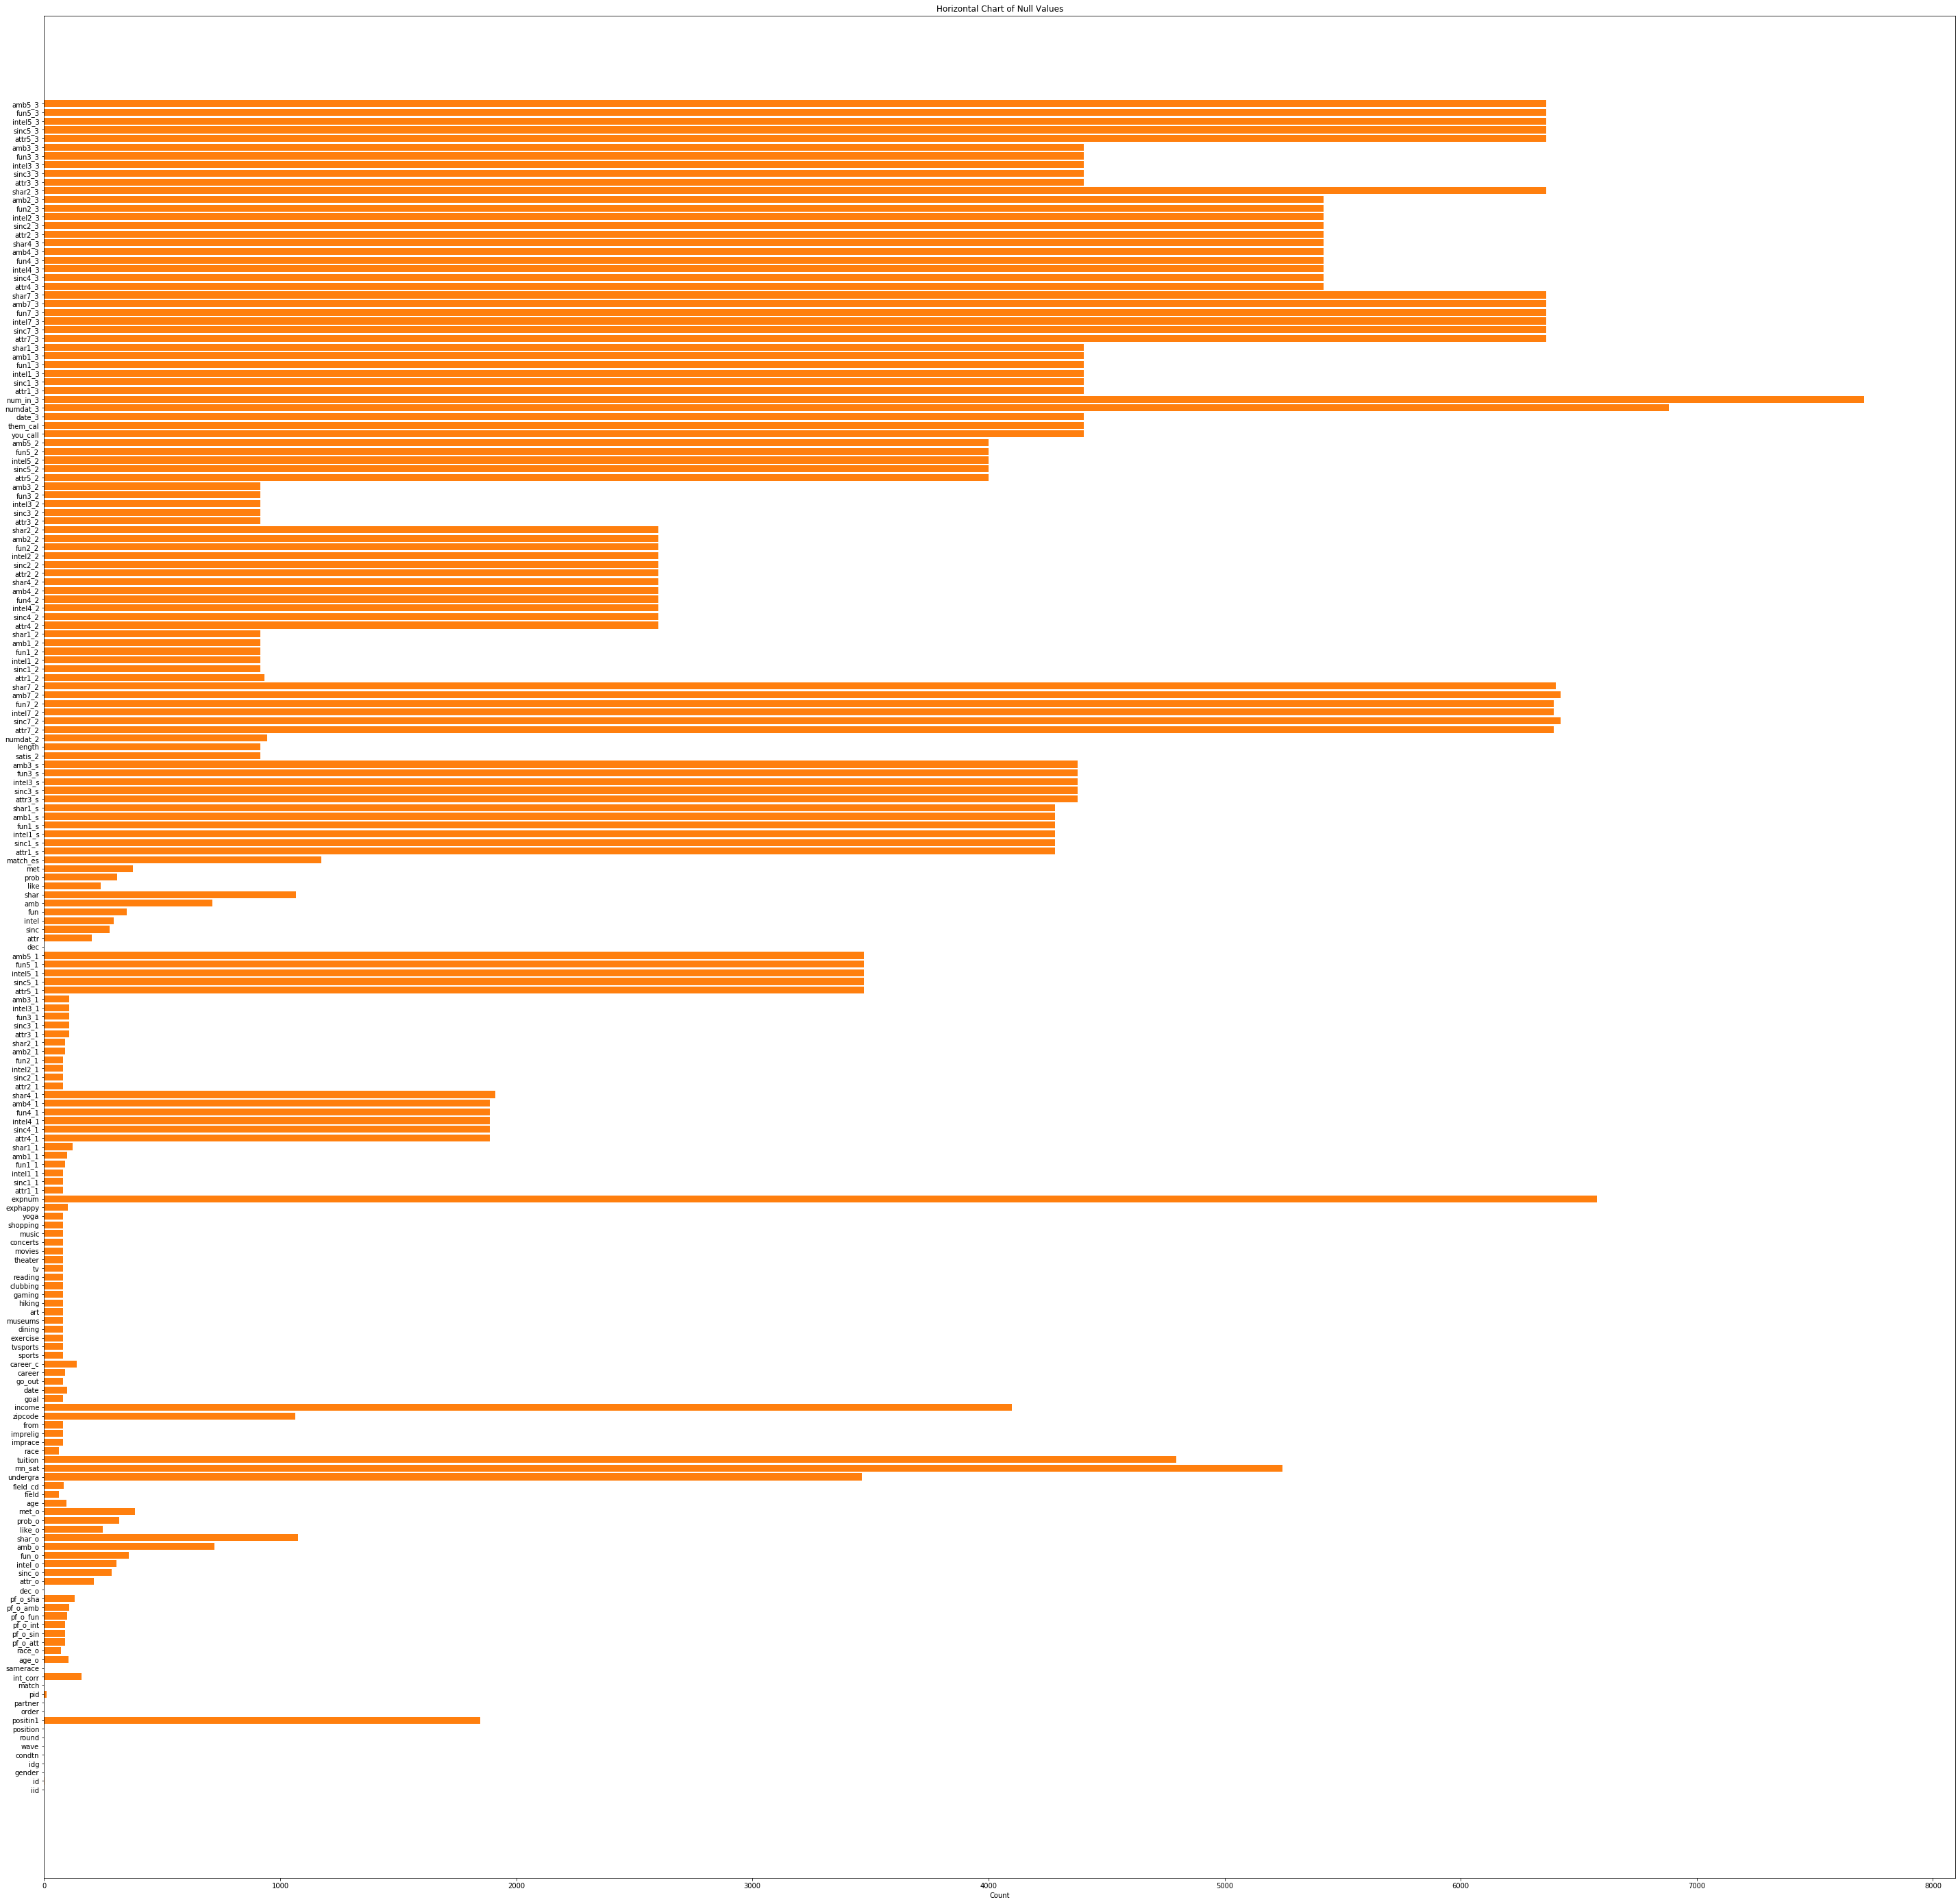

In [9]:
# Visualization of nulls in dataset

#creating a fig object with appropriate size
fig= plt.figure(1, figsize=(50, 50))
#adding one subplot
ax=fig.add_subplot(111)
#passing data
plt.barh(nulls.index,nulls)
#Naming conventionsplt.ylabel("Columns")
plt.xlabel("Count")
plt.title("Horizontal Chart of Null Values")

plt.barh(nulls.index, nulls.values)

From the peek at the data we had above, there are a ton of fields with NaNs. A lot of NaNs. There are 8,378 rows and a bunch of fields have thousands of NaNs and probably bad practice to use imputation to guess the values.We will explore this later.

#### Exploring Age Factor

/home/jasp/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jasp/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  30.,  346., 1549., 1700., 1928., 1335.,  574.,  335.,  313.,
         105.,   24.,   18.,   20.,    0.,    0.,    0.,    0.,    0.,
           0.,    6.]),
 array([18.  , 19.85, 21.7 , 23.55, 25.4 , 27.25, 29.1 , 30.95, 32.8 ,
        34.65, 36.5 , 38.35, 40.2 , 42.05, 43.9 , 45.75, 47.6 , 49.45,
        51.3 , 53.15, 55.  ]),
 <a list of 20 Patch objects>)

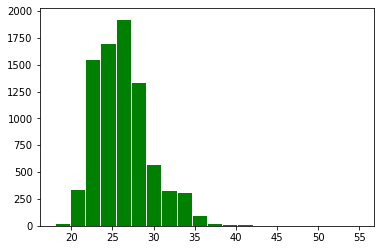

In [10]:
#basic histogram to check the age factor.
plt.hist(df.age,bins=20, facecolor='green', edgecolor = 'white')

 So most of the participants were in <b>mid twenties to early thirties</b>, let's find out the exact count

In [11]:
print(color.BOLD + str(int((len(df.age[(df.age>=25) & (df.age<=35)]) / df.shape[0])*100)) + color.END, "% of the people are between 25 & 35")

64 % of the people are between 25 & 35


#### Let's see how many speed daters found a match 

In [12]:
temp_df_matched_count = pd.crosstab(index=df.match,columns="count")
temp_df_matched_count

col_0,count
match,
0,6998
1,1380


<b>1380</b> candidates were successfull 

In [251]:
# convert it to percentage
print(color.BOLD + str(int((temp_df_matched_count.iloc[1,] / df.shape[0]) * 100)) + color.END + " % actually found the second date")

16 % actually found the second date


<p style="font-size:30px;">That's not good lets explore other stuffs !</p>

![](jerry.gif)

#### Exploring Gender factor

In [13]:
# Cheking if there are some NA in gender 
df.gender.isna().sum()

0

In [14]:
# Checking the levels of this categorical variables 
df.gender.unique()

array([0, 1])

We only have two values , <b>0 - Females & 1 - Males 

In [15]:
# Checking the participation levels
df.gender.value_counts()

1    4194
0    4184
Name: gender, dtype: int64

As expected, we are having approximately <b>equal participation !

#### Analysing the age and gender

In [16]:
#Here we are using group by 
gb = df.groupby(['gender','age']).age.count()
gb

gender  age 
0       19.0     10
        20.0     30
        21.0    183
        22.0    364
        23.0    507
        24.0    454
        25.0    455
        26.0    492
        27.0    441
        28.0    316
        29.0    227
        30.0    211
        31.0     54
        32.0     57
        33.0    125
        34.0     83
        35.0     60
        36.0     25
        38.0     19
        55.0      6
1       18.0     10
        19.0     10
        20.0     25
        21.0    108
        22.0    291
        23.0    387
        24.0    409
        25.0    382
        26.0    377
        27.0    618
        28.0    430
        29.0    362
        30.0    363
        31.0     71
        32.0    153
        33.0     36
        34.0     69
        36.0     20
        37.0      5
        39.0     18
        42.0     20
Name: age, dtype: int64

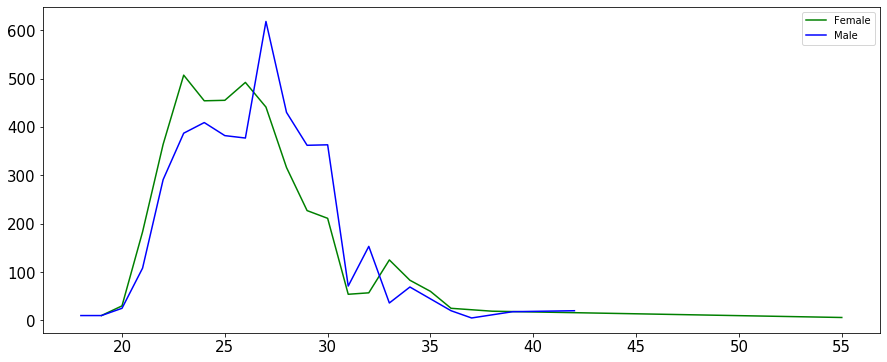

In [17]:
# lets plot in line plot to study multivariate relation ship.
%matplotlib inline

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1,1,1)
ax.plot(gb[0],'g', label = 'Female')
ax.plot(gb[1],'b',label = 'Male')
ax.legend(loc='best')

ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)

This is interesting, <b>females have started earlier and the peak for male is between 25 to 30.

#### The Gender Advantage

I wonder... how many of each gender are there and does that affect the other person's decision? <b>That is, do women receive more positive final decisions from the other person (dec_o) than men do?

In [18]:
# Another group by 
gb = df.groupby(['gender','dec_o']).age.count()
gb

gender  dec_o
0       0        2164
        1        1955
1       0        2652
        1        1512
Name: age, dtype: int64

In [19]:
gb[0].index

Int64Index([0, 1], dtype='int64', name='dec_o')

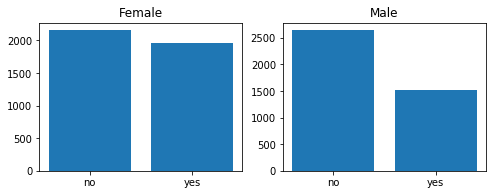

In [20]:
%matplotlib inline

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)


ax1.bar(['no','yes'],gb[0].values)
ax2.bar(['no','yes'],gb[1].values)
ax1.title.set_text("Female")
ax2.title.set_text("Male")

ax1.tick_params(axis='x', which='major', labelsize=10)
ax1.tick_params(axis='y', which='major', labelsize=10)


ax2.tick_params(axis='x', which='major', labelsize=10)
ax2.tick_params(axis='y', which='major', labelsize=10)



It looks like women received about 1750 'no' and about 1600 'yes' for the decision question "Would you like to see him or her again?". Men received about 2050 'no' and about 1300 'yes'. In other words, <b>men are more likely to be rejected by women than women are to be rejected by men (wahwah)</b>. 

<p style="font-size:30px;">poor guys !</p>

![](girl.gif)

#### Broken Hearts

Broken Hearts ie people who were rejected by opposite sex, but they were interested in second date.

In [21]:
# dec is a variable which says if someone was interested , this was taken later in survey
# dec_0 is the actual variable of decision 

broken_heart = len(df[(df['dec_o']==0) & (df['dec']==1)]) + len(df[(df['dec_o']==1) & (df['dec']==0)])
print("So it seems " + color.BOLD +  str(int((broken_heart/len(df.index))*100)) + " % of participants unfortunately had their heart broken")

So it seems 51 % of participants unfortunately had their heart broken


#### Professions most in demand 

Let's first see the professions of participants 

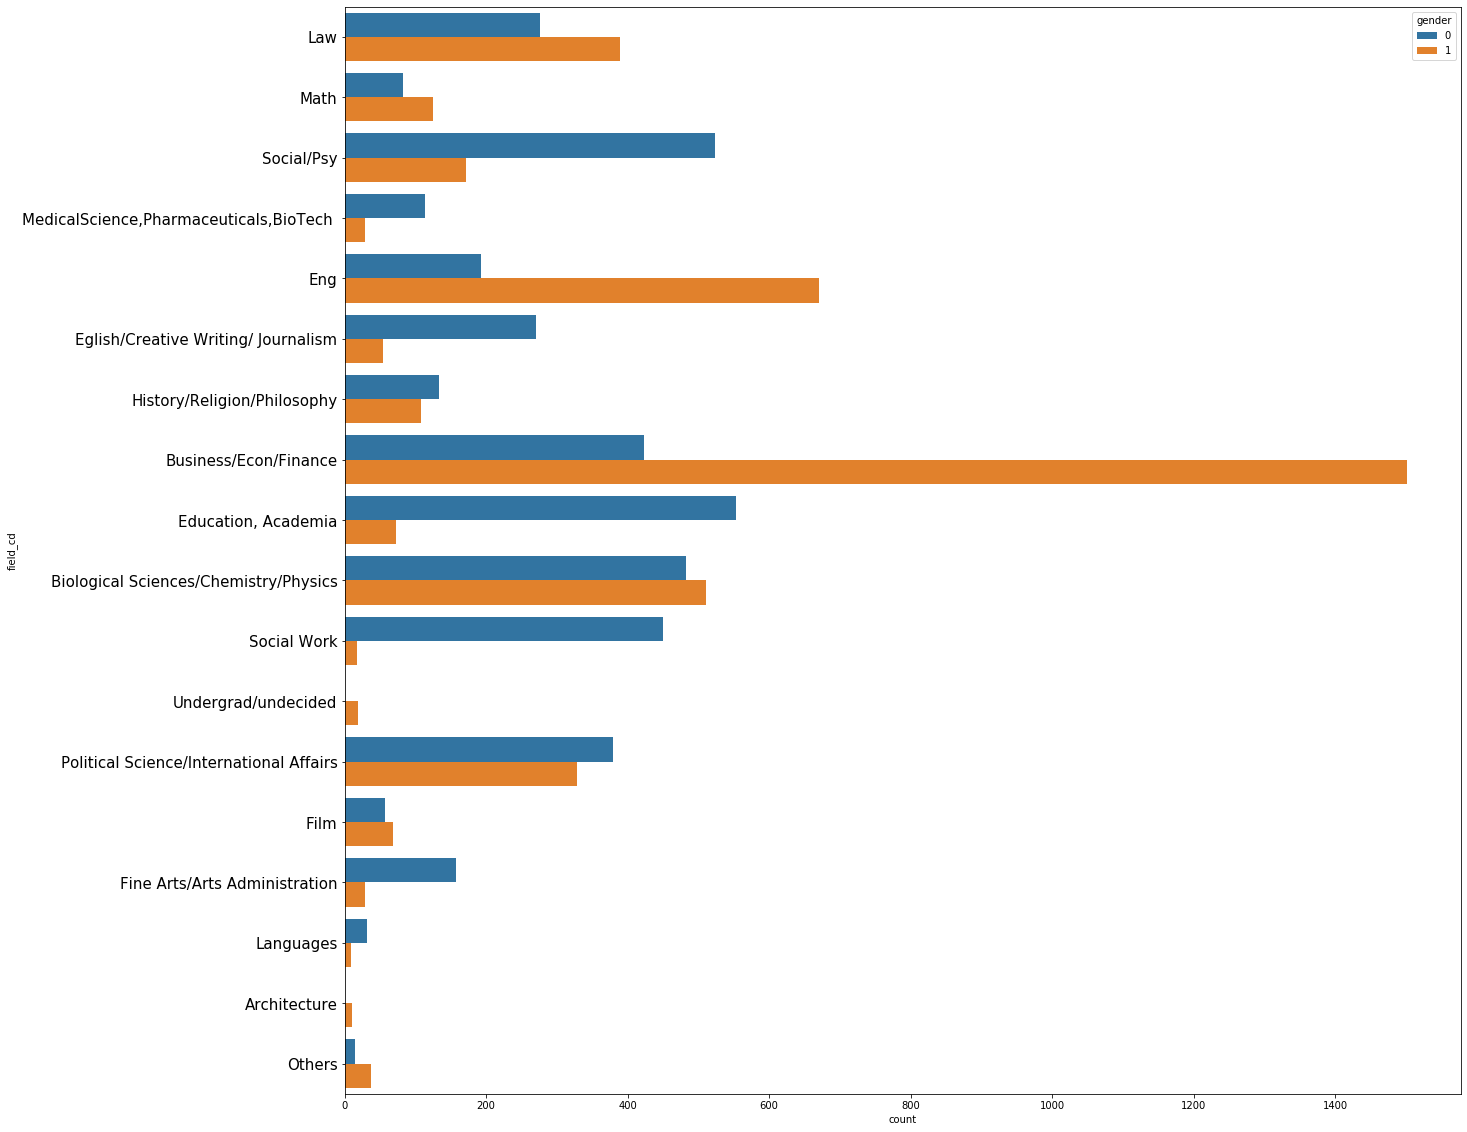

In [269]:
# be mindfull here we are using seaborn 

field_cd = ['Law','Math','Social/Psy','MedicalScience,Pharmaceuticals,BioTech ',
                   'Eng','Eglish/Creative Writing/ Journalism','History/Religion/Philosophy',
                  'Business/Econ/Finance','Education, Academia','Biological Sciences/Chemistry/Physics',
                  'Social Work','Undergrad/undecided','Political Science/International Affairs',
                  'Film','Fine Arts/Arts Administration','Languages','Architecture','Others']
g = plt.figure(figsize=(20,20))
g = sns.countplot(y="field_cd",data=df, hue='gender')
g.set(yticklabels=field_cd)
g = plt.yticks(rotation=0,fontsize=15)

Now, lets interpret whic one is the most preffered one 

In [60]:
# This time we are using pivot table for interpretation
df_new = pd.pivot_table(df[['field','dec_o']], index=["field"], aggfunc=np.sum)
display(df_new.dec_o.sort_values(ascending=True).head(10), df_new.dec_o.sort_values(ascending=True).tail(10))

field
Business (Finance & Marketing)                 0
financial math                                 0
International Politics                         0
international affairs/international finance    0
Earth and Environmental Science                0
Stats                                          0
speech pathology                               0
Economics and Political Science                0
physics (astrophysics)                         0
Public Health                                  0
Name: dec_o, dtype: int64

field
Finance                    47
Electrical Engineering     52
business                   52
law                        54
Psychology                 62
International Affairs     107
Social Work               152
MBA                       209
Law                       209
Business                  262
Name: dec_o, dtype: int64

Here, we got to know <b>Business people and MBA's</b>  received most positive responces.

<p style="font-size:30px;">Business scholars can pamper themselves.</p>

![](business.gif)

#### Let's Analyse the GOAL of participants

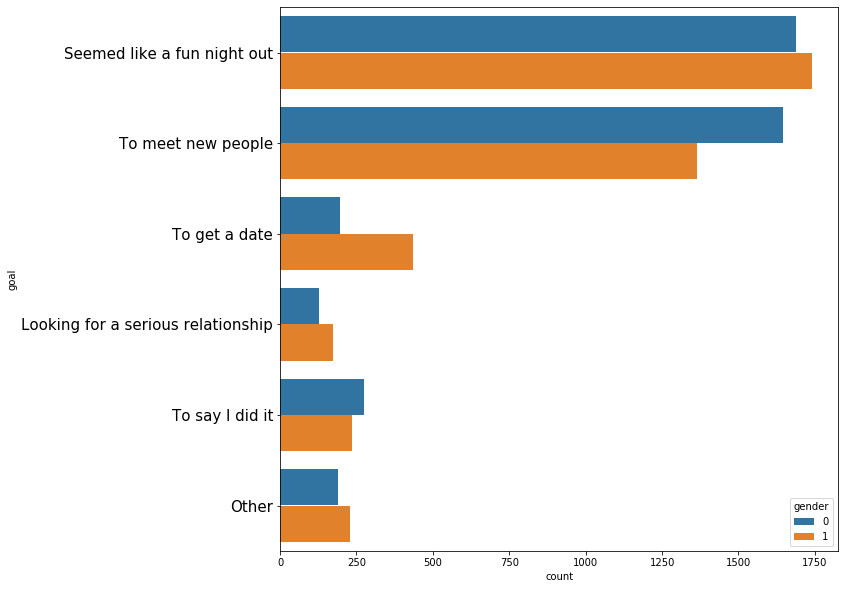

In [271]:
#### again be mind full we are using seaborn
goal = ['Seemed like a fun night out','To meet new people','To get a date','Looking for a serious relationship',
        'To say I did it','Other']
g = plt.figure(figsize=(10,10))
g = sns.countplot(y="goal",data=df, hue='gender')
g.set(yticklabels=goal)
g = plt.yticks(rotation=0,fontsize=15)

<b>wait wait </b>, this seems interesting very few people were actually looking for a date or a serious relationship, lets see if they were the one who got the match or not.

In [22]:
# 3-to get a date 
# 4 is to get a serious relationship
print("There were only ", color.PURPLE + color.BOLD+str(len(df[(df['goal']==3) | (df['goal']==4)])) ,color.END+ " individuals who were into serious dating.""\n Of which only ",color.PURPLE +color.BOLD +str(len(df[ (df['goal']==3) | (df['goal']==4) & (df['match'] == 1) ])) + color.END, " got the date.","\n Which means", color.BOLD + color.GREEN +str(int((682/932)*100)), " %"  + color.END, " success rate.")

There were only  932  individuals who were into serious dating.
 Of which only  682  got the date. 
 Which means 73  %  success rate.


#### Hobbies 

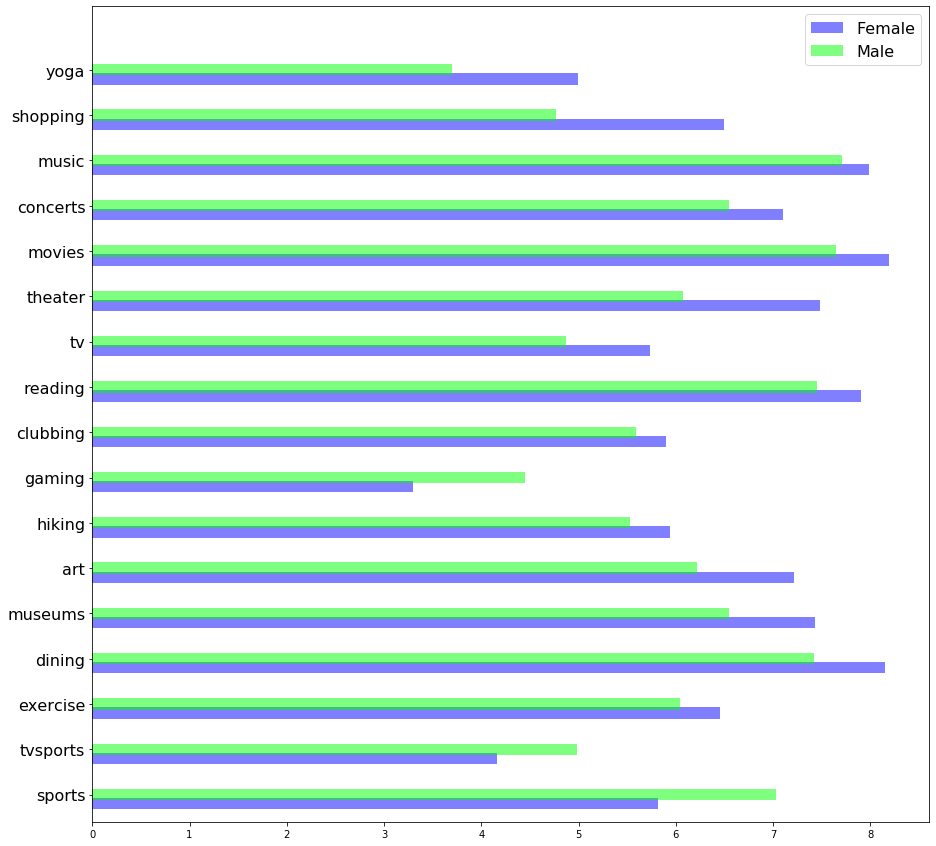

In [23]:
activities_interested=['sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading',
                       'tv','theater','movies','concerts','music','shopping','yoga']
temp = df.groupby(['gender']).mean()[activities_interested].values

g = plt.figure(figsize=(15,15))
g = plt.barh(np.arange(0,2*temp.shape[1],2)-0.2,temp[0,:], height=0.5,color=[0,0,1],alpha=0.5,label='Female')
g = plt.barh(np.arange(0,2*temp.shape[1],2)+0.2,temp[1,:], height=0.5,color=[0,1,0],alpha=0.5,label='Male')
g = plt.yticks(np.arange(0,2*temp.shape[1],2)+0.2,activities_interested,fontsize=16)
g = plt.ylim(-1,2*temp.shape[1]+1)
g = plt.legend(loc=0,fontsize=16)


#### Let's check out the relation between SAT score and match

In [24]:
df.mn_sat.isnull().sum()

5245

In [25]:
df_new = df[df['mn_sat'].notna()]

In [26]:
df_new.mn_sat.describe() # some stats here

count         3133
unique          68
top       1,400.00
freq           403
Name: mn_sat, dtype: object

In [27]:
df_new = df_new[['dec_o','mn_sat']]

In [28]:
df_new.groupby(['dec_o']).first()

,mn_sat
dec_o,
0,"1,070.00"
1,"1,070.00"


Interestingly, average score for both acceptance and rejection is same , which means in this study inteligence does not play any role.

#### oops, we are forgeting about religion and race, lets explore 

In [29]:
#imprace is the variable indicating importance of race in dating
df.imprace.isna().sum()

79

In [30]:
df.imprelig.isna().sum()

79

In [31]:
# Here I am simply dropping null values  since it is very less 
df_new = df[(df['imprace'].notna()) & (df['imprelig'].notna())]

In [32]:
df_new = df_new[['imprace','imprelig','age','gender']]

In [33]:
gb = df_new.groupby(['age']).first()

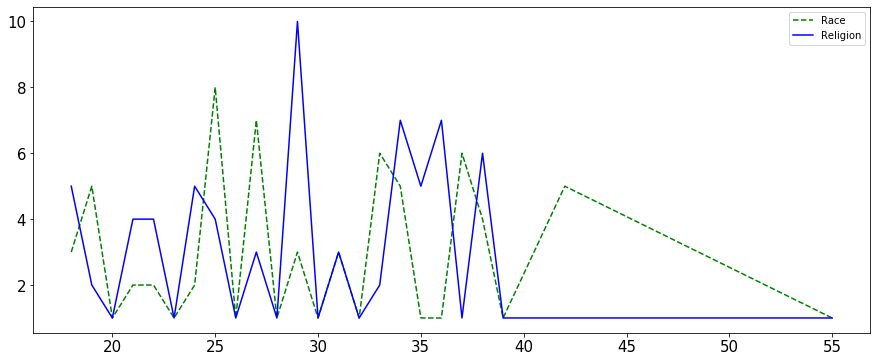

In [90]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1,1,1)
ax.plot(gb['imprace'],'g--', label = 'Race')
ax.plot(gb['imprelig'],'b',label = 'Religion')
ax.legend(loc='best')

ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)

Interestingly <b>religion matters the most at the age of 27 to 30</b>, but race doesnot show any trends 

In [34]:
df_new.groupby(['gender']).first()

,imprace,imprelig,age
gender,,,
0,2.0,4.0,21.0
1,7.0,3.0,27.0


In [35]:
df_new = pd.pivot_table(df_new, index=["gender","age"], aggfunc=np.average)

In [36]:
df_new.head()

imprace  imprelig
gender age                     
0      19.0  5.000000  2.000000
       20.0  1.333333  3.000000
       21.0  5.710383  4.868852
       22.0  4.335165  4.464286
       23.0  5.074951  4.568047

In [37]:
df_new['imprelig'].loc[:]

gender  age 
0       19.0    2.000000
        20.0    3.000000
        21.0    4.868852
        22.0    4.464286
        23.0    4.568047
        24.0    4.477974
        25.0    5.158242
        26.0    3.781513
        27.0    3.979592
        28.0    3.136076
        29.0    4.819383
        30.0    3.838863
        31.0    3.296296
        32.0    3.315789
        33.0    3.208000
        34.0    4.024096
        35.0    3.466667
        36.0    6.280000
        38.0    6.000000
        55.0    1.000000
1       18.0    5.000000
        19.0    1.000000
        20.0    1.000000
        21.0    3.055556
        22.0    3.099656
        23.0    3.439276
        24.0    2.481663
        25.0    2.814136
        26.0    3.546419
        27.0    3.224919
        28.0    3.539535
        29.0    2.157459
        30.0    3.393939
        31.0    2.690141
        32.0    3.529412
        33.0    3.416667
        34.0    3.942029
        36.0    7.100000
        37.0    1.000000
        39.0

#### One of my friend told me that womens generally prefer elder boyfriends, let us figure out from this data set

In [38]:
df_new = df[(df['gender'] == 0)  & (df['dec_o'] ==1)]

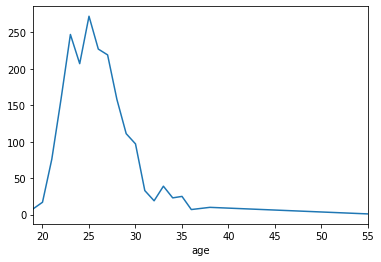

In [39]:
df_new.groupby(['age']).age.count().plot()

From this graph, it is clear more younger girls were into second date

#### What does a person looks for in a partner ?

![](look.gif)

/home/jasp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Attractiveness score for Potential Date')

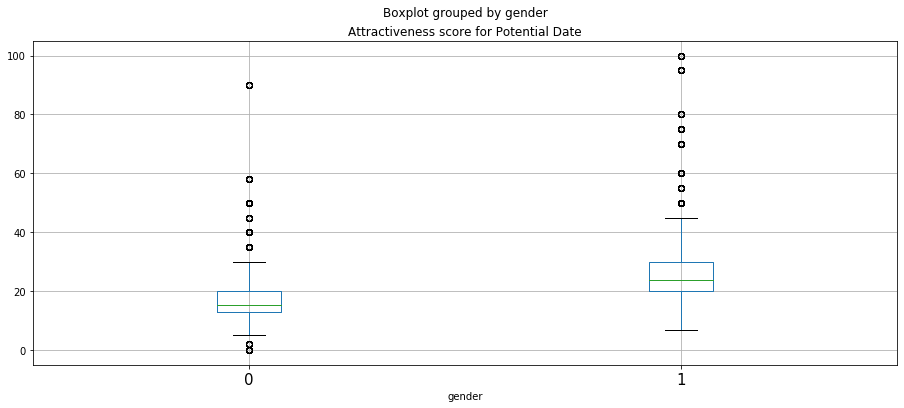

In [91]:
fig= plt.figure(1, figsize=(15, 6))
ax=fig.add_subplot(111)
ax=fig.add_subplot(111)

# Create the boxplot
bp = df.boxplot(column='attr1_1',by='gender', ax=ax)
ax.tick_params(axis='x', which='major', labelsize=15)
ax.set_title("Attractiveness score for Potential Date")


For ladies out there attractiveness matters less as compared to males

/home/jasp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Sincerity score for Potential Date')

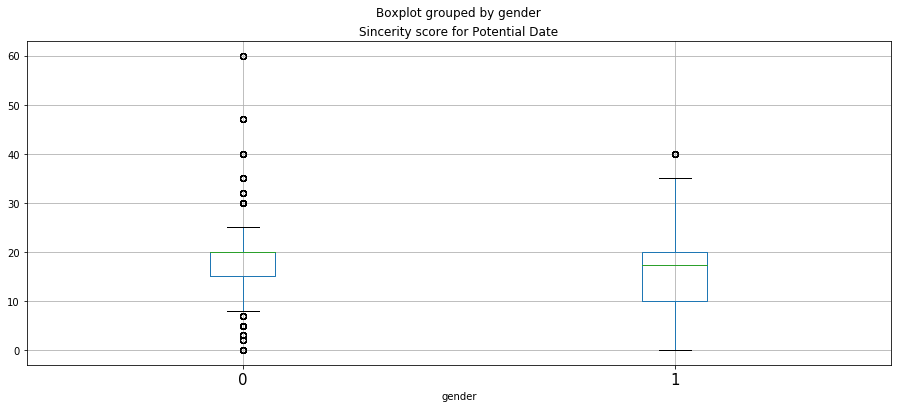

In [92]:
fig= plt.figure(1, figsize=(15, 6))
ax=fig.add_subplot(111)
ax=fig.add_subplot(111)

# Create the boxplot
bp = df.boxplot(column='sinc1_1',by='gender', ax=ax)
ax.tick_params(axis='x', which='major', labelsize=15)
ax.set_title("Sincerity score for Potential Date")

As expected girls look for sincerity, <b> but, there are many outliers

/home/jasp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Intelligience score for Potential Date')

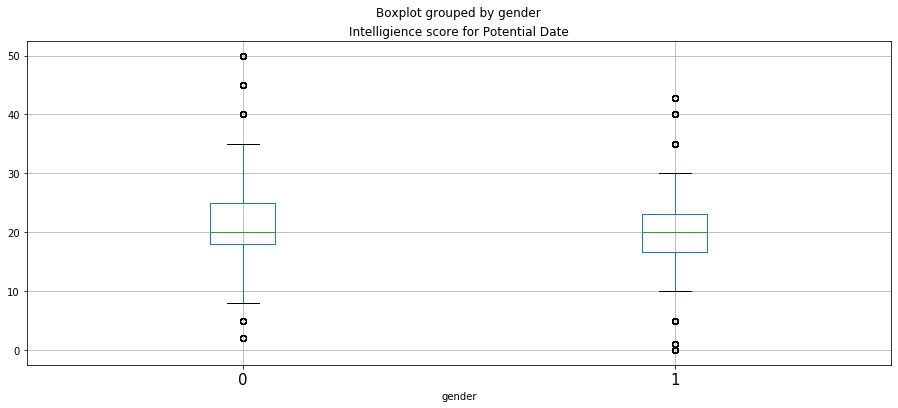

In [280]:
fig= plt.figure(1, figsize=(15, 6))
ax=fig.add_subplot(111)
ax=fig.add_subplot(111)

# Create the boxplot
bp = df.boxplot(column='intel1_1',by='gender', ax=ax)
ax.tick_params(axis='x', which='major', labelsize=15)
ax.set_title("Intelligience score for Potential Date")

/home/jasp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Fun score for Potential Date')

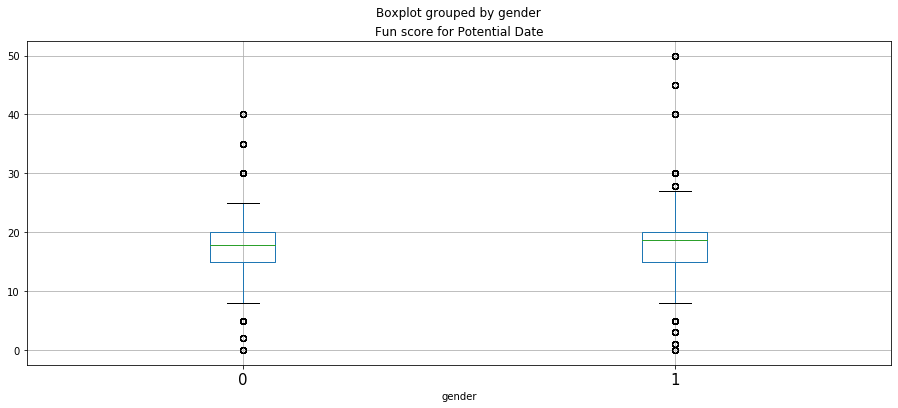

In [96]:
fig= plt.figure(1, figsize=(15, 6))
ax=fig.add_subplot(111)
ax=fig.add_subplot(111)

# Create the boxplot
bp = df.boxplot(column='fun1_1',by='gender', ax=ax)
ax.tick_params(axis='x', which='major', labelsize=15)
ax.set_title("Fun score for Potential Date")

/home/jasp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Ambition score for Potential Date')

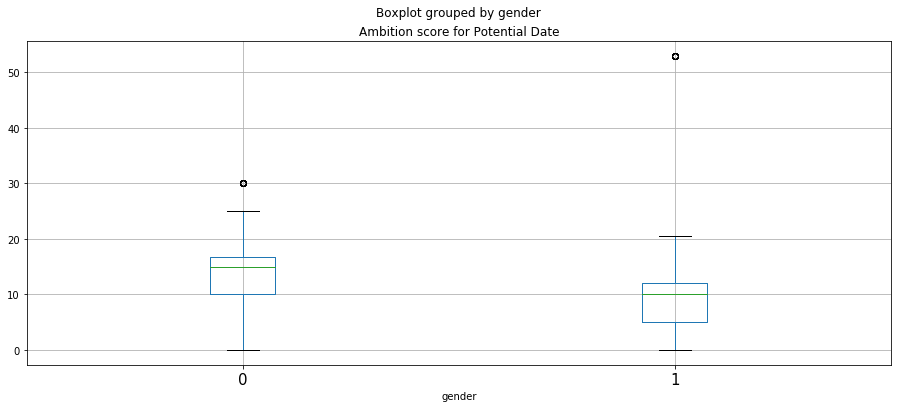

In [98]:
fig= plt.figure(1, figsize=(15, 6))
ax=fig.add_subplot(111)
ax=fig.add_subplot(111)

# Create the boxplot
bp = df.boxplot(column='amb1_1',by='gender', ax=ax)
ax.tick_params(axis='x', which='major', labelsize=15)
ax.set_title("Ambition score for Potential Date")

Ok, so girls look for ambitious boys , but for boys it does'nt matter, <b> also I am amazed to see the unanimity , very less out liers

/home/jasp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Shared Interest score for Potential Date')

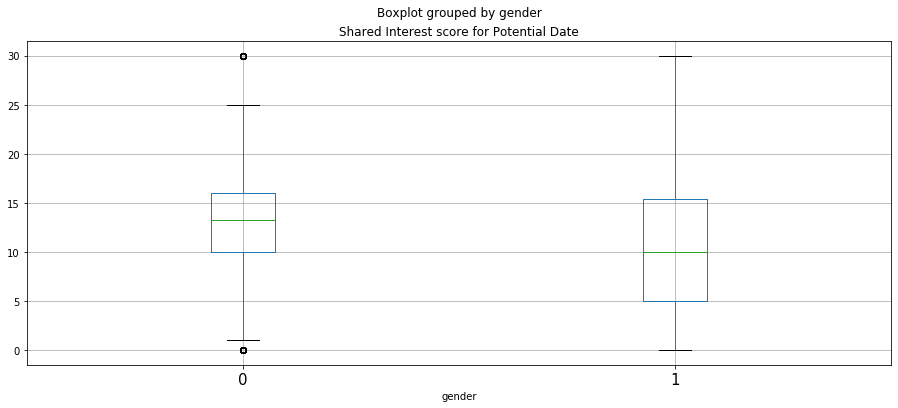

In [99]:
fig= plt.figure(1, figsize=(15, 6))
ax=fig.add_subplot(111)
ax=fig.add_subplot(111)

# Create the boxplot
bp = df.boxplot(column='shar1_1',by='gender', ax=ax)
ax.tick_params(axis='x', which='major', labelsize=15)
ax.set_title("Shared Interest score for Potential Date")

Text(0.5, 1.0, 'Attractiveness ! What do you think your partner looks for you')

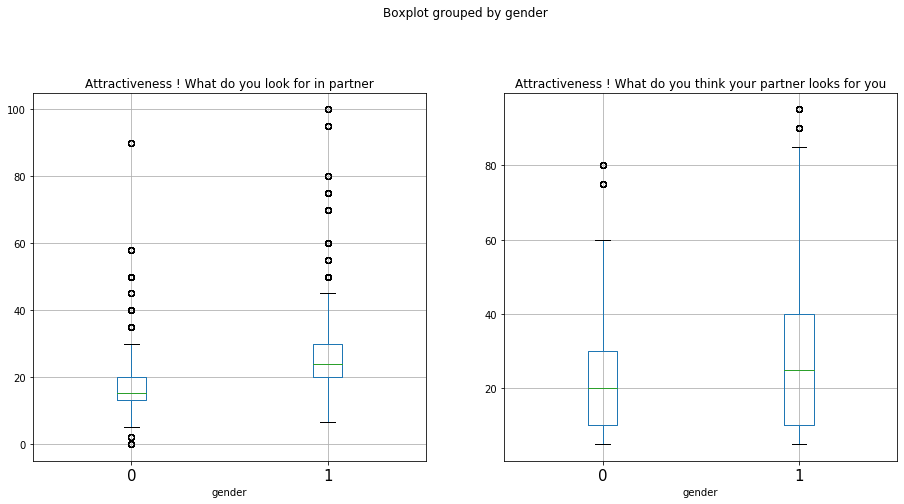

In [114]:
fig= plt.figure(1, figsize=(15, 15))
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)

# Create the boxplot
bp = df.boxplot(column='attr1_1',by='gender', ax=ax1)
cd = df.boxplot(column='attr4_1',by='gender', ax=ax2) 

ax1.tick_params(axis='x', which='major', labelsize=15)
ax1.set_title("Attractiveness ! What do you look for in partner")

ax2.tick_params(axis='x', which='major', labelsize=15)
ax2.set_title("Attractiveness ! What do you think your partner looks for you")


### Building a machine learning model to predict the chances of getting matched 

![](box.gif)

In [44]:
ml_df = df[['gender','samerace','race_o','attr_o','sinc_o','fun_o','amb_o','shar_o','like_o','prob_o','met_o','age','field_cd','race','imprace','imprelig','goal','sports','tvsports','exercise','dining','museums','art','hiking','gaming','reading','tv','theater','movies','concerts','music','shopping','yoga','exphappy' ,'match']]

In [45]:
ml_df.isna().sum()

gender         0
samerace       0
race_o        73
attr_o       212
sinc_o       287
fun_o        360
amb_o        722
shar_o      1076
like_o       250
prob_o       318
met_o        385
age           95
field_cd      82
race          63
imprace       79
imprelig      79
goal          79
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
reading       79
tv            79
theater       79
movies        79
concerts      79
music         79
shopping      79
yoga          79
exphappy     101
match          0
dtype: int64

In [46]:
# impute the nul values with mean
ml_df = ml_df.apply(lambda x: x.fillna(x.mean()),axis=0)

In [47]:
ml_df.isna().sum()

gender      0
samerace    0
race_o      0
attr_o      0
sinc_o      0
fun_o       0
amb_o       0
shar_o      0
like_o      0
prob_o      0
met_o       0
age         0
field_cd    0
race        0
imprace     0
imprelig    0
goal        0
sports      0
tvsports    0
exercise    0
dining      0
museums     0
art         0
hiking      0
gaming      0
reading     0
tv          0
theater     0
movies      0
concerts    0
music       0
shopping    0
yoga        0
exphappy    0
match       0
dtype: int64

#### Logistic Regression 

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(ml_df.drop('match',axis=1), 
                                                    ml_df['match'], test_size=0.30)

In [49]:
# Training and predictions 

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

/home/jasp/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2117
           1       0.63      0.18      0.28       397

    accuracy                           0.85      2514
   macro avg       0.75      0.58      0.60      2514
weighted avg       0.83      0.85      0.82      2514



In [51]:
sample = X_test.iloc[0:1]

In [52]:
type(sample)

pandas.core.frame.DataFrame

In [53]:
sample

,gender,samerace,race_o,attr_o,sinc_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,sports,tvsports,exercise,dining,museums,art,hiking,gaming,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy
5391,1,0,4.0,8.0,10.0,7.0,10.0,6.0,4.0,3.0,2.0,34.0,1.0,2.0,5.0,5.0,2.0,3.0,1.0,3.0,5.0,9.0,10.0,3.0,3.0,10.0,6.0,8.0,9.0,7.0,7.0,3.0,2.0,5.0


In [54]:
logmodel.predict(sample)

array([0])

#### Reading a HTML form

Supposing that we have a HTML form , and we need to read data from web

![](form.png)

In [55]:
#reading the html page
read_from_html = pd.read_html('form.html')

In [56]:
len(read_from_html) # it is read as list of dataframes

1

In [57]:
test = read_from_html[0] # this is the first dataframe

In [58]:
test.set_index('Parameter', inplace=True)

In [59]:
test.T # tansposing to fed it to the algorithm

Parameter,gender,samerace,race_o,attr_o,sinc_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,sports,tvsports,exercise,dining,museums,art,hiking,gaming,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy
Value,0,0,4,7,6,6,6,5,6,6,2,27,1,6,6,1,1,8,7,8,5,7,7,7,7,9,5,7,9,7,8,4,7,5


In [60]:
logmodel.predict(test.T) # feeding it to the algo

array([0])

<p style="font-size:30px;">"0" means no second date for me today!</p>

![](sad.gif)

Don't loose hope Buddy, will retry with an interactive form

### Interactive form in jupyter notebook

In [61]:
# The goal is get get input interactively and def it into algo
list_inputs = []
for col in X_test.columns:
    print("Please enter value for " + col + " value should be between 0 & "  + str(X_test[col].max()))
    list_inputs.append(input())

Please enter value for gender value should be between 0 & 1
1
Please enter value for samerace value should be between 0 & 1
0
Please enter value for race_o value should be between 0 & 6.0
5
Please enter value for attr_o value should be between 0 & 10.0
5
Please enter value for sinc_o value should be between 0 & 10.0
6
Please enter value for fun_o value should be between 0 & 10.0
7
Please enter value for amb_o value should be between 0 & 10.0

Please enter value for shar_o value should be between 0 & 10.0
8
Please enter value for like_o value should be between 0 & 10.0
5
Please enter value for prob_o value should be between 0 & 10.0
7
Please enter value for met_o value should be between 0 & 7.0
6
Please enter value for age value should be between 0 & 55.0
7
Please enter value for field_cd value should be between 0 & 18.0
6
Please enter value for race value should be between 0 & 6.0
7
Please enter value for imprace value should be between 0 & 10.0
6
Please enter value for imprelig value 

In [62]:
list_inputs

['1',
 '0',
 '5',
 '5',
 '6',
 '7',
 '',
 '8',
 '5',
 '7',
 '6',
 '7',
 '6',
 '7',
 '6',
 '7',
 '6',
 '7',
 '6',
 '7',
 '6',
 '7',
 '6',
 '7',
 '6',
 '7',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6']

In [63]:
sample_interactive = pd.DataFrame(data  = list_inputs, index=X_test.columns).T

In [64]:
sample_interactive

,gender,samerace,race_o,attr_o,sinc_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,sports,tvsports,exercise,dining,museums,art,hiking,gaming,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy
0,1,0,5,5,6,7,,8,5,7,6,7,6,7,6,7,6,7,6,7,6,7,6,7,6,7,6,6,6,6,6,6,6,6


In [65]:
logmodel.predict(sample_interactive)

ValueError: could not convert string to float: 

<p style="font-size:30px;">Thanks !</p> Tom is going to venus to understand girls.

![](bye.gif)